---

# 1. Deep Learning with Tensorflow 1 (Linear Regression)

# Goal: 

## Linear regression with Tf

# _00. Import Main Libraries_

# _01. Linear Regression Units_

# _02. Load the Data and Observe the Basics_

# _03. Train Test Split_

# _04. LinReg and Loss Functions_

# _05. Training, Test and Evaluation_

---
---
---

# _00. Import Main Libraries_

In [2]:
import tensorflow as tf

import pandas as pd

import numpy as np

import matplotlib.patches as mpatches

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
print(tf.__version__)

2.6.0


# _01. Linear Regression Units_

In [4]:
# Y = a*X + b

In [5]:
X = np.arange(0., 5., 0.1)

print(X)

a = 1.

b = 0

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


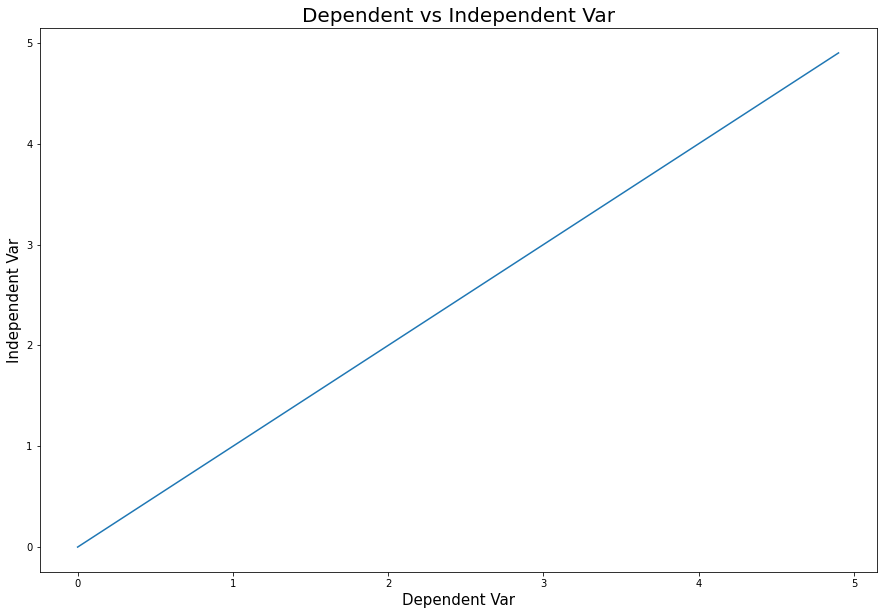

In [6]:
y = a * X + b

plt.figure(figsize=(15, 10))

plt.plot(X, y)

plt.title("Dependent vs Independent Var", fontsize = 20)

plt.ylabel('Independent Var', fontsize = 15)

plt.xlabel('Dependent Var', fontsize = 15)

plt.show()

# _02. Load the Data and Observe the Basics_

In [7]:
# load the data

df = pd.read_csv("l1FuelConsumptionCo2.csv")

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# _03. Train Test Split_

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# X and y values for training

X_data = np.asanyarray(df[["ENGINESIZE"]])

y_data = np.asanyarray(df[["CO2EMISSIONS"]])

X_data

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

# _04. Loss Functions_

In [13]:
# Loss Functions

lossFmsle = tf.keras.losses.MeanSquaredLogarithmicError()

lossFmse = tf.keras.losses.MeanSquaredError()

lossFmae = tf.keras.losses.MeanAbsoluteError()

# _05. Training, Test and Evaluation_

In [14]:
a = tf.Variable(1.)
b = tf.Variable(1.)

In [15]:
learning_rate = 0.05

training_epochs = 200

train_data = []

a_values = []

b_values = []

loss_values = []

In [16]:
# train model

for epoch in range(training_epochs):
    
    with tf.GradientTape() as tape:
        
        y_predicted = a * X_train + b
        
        loss_value = lossFmse(y_train, y_predicted)
        
        loss_values.append(loss_value)
        
        gradients = tape.gradient(loss_value, [b, a])
        
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        
        b.assign_sub(gradients[0] * learning_rate)
        
        a.assign_sub(gradients[1] * learning_rate)
        
        if epoch % 10 == 0:
            train_data.append([a.numpy(),b.numpy()])

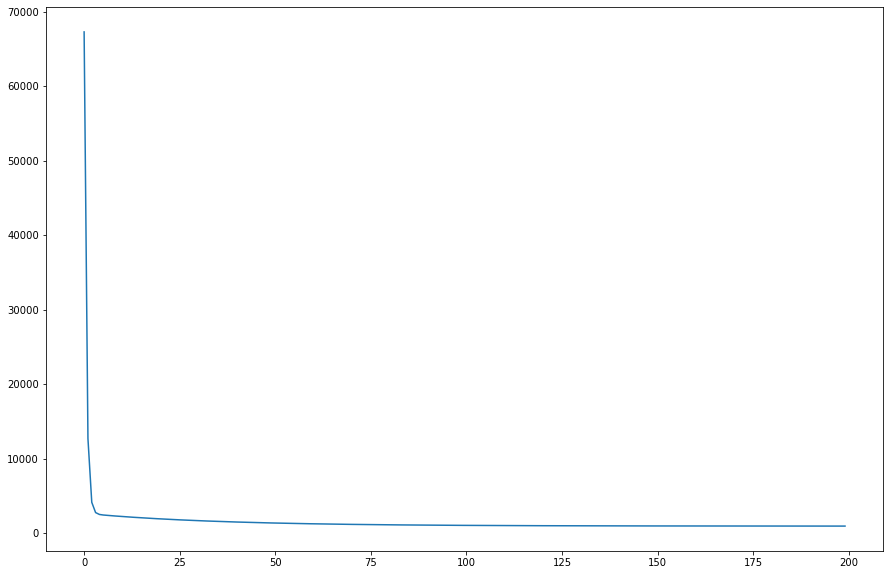

In [17]:
plt.figure(figsize=(15, 10))

plt.plot(loss_values)

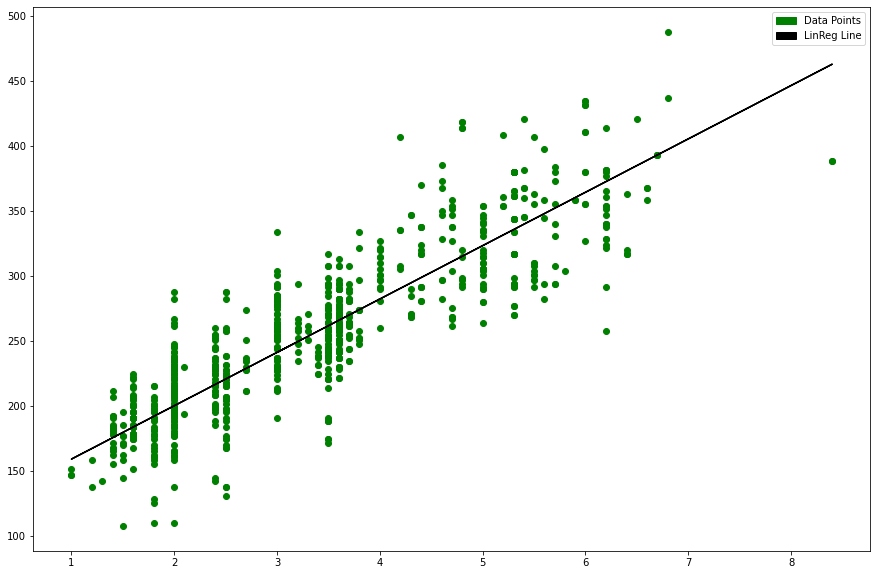

In [18]:
plt.figure(figsize=(15, 10))

plt.scatter(X_train, y_train, color = "green")

plt.plot(X_train, a_values[-1]*X_train + b_values[-1], color = "black")

dataPatch = mpatches.Patch(color = "Green", label = "Data Points")

finalPatch = mpatches.Patch(color = "Black", label = "LinReg Line")

plt.legend(handles = [dataPatch, finalPatch])

plt.show()

In [19]:
b_values

[1.0,
 26.190142,
 18.316402,
 23.478308,
 23.460346,
 25.46066,
 26.635357,
 28.108578,
 29.436516,
 30.794926,
 32.11474,
 33.42362,
 34.711006,
 35.981434,
 37.233475,
 38.468044,
 39.685127,
 40.88508,
 42.068092,
 43.23443,
 44.384315,
 45.517986,
 46.635666,
 47.737583,
 48.823963,
 49.89502,
 50.950974,
 51.992035,
 53.018414,
 54.03032,
 55.027954,
 56.011517,
 56.981213,
 57.93723,
 58.879765,
 59.80901,
 60.725147,
 61.628365,
 62.518845,
 63.396767,
 64.26231,
 65.11564,
 65.95694,
 66.78638,
 67.60412,
 68.410324,
 69.20516,
 69.988785,
 70.76136,
 71.52304,
 72.27398,
 73.01433,
 73.74423,
 74.463844,
 75.17331,
 75.872765,
 76.56236,
 77.24223,
 77.91251,
 78.57334,
 79.22485,
 79.86717,
 80.500435,
 81.12476,
 81.74029,
 82.34714,
 82.94543,
 83.53528,
 84.11681,
 84.69015,
 85.255394,
 85.81267,
 86.36208,
 86.90375,
 87.437775,
 87.96427,
 88.483345,
 88.995094,
 89.499626,
 89.99705,
 90.48745,
 90.97094,
 91.44761,
 91.91756,
 92.380875,
 92.83766,
 93.288,
 93.73199

In [20]:
# Test

y_test_predicted = a * X_test + b

In [21]:
loss_value = lossFmse(y_test, y_test_predicted)

In [22]:
tf.print("Mean Square Error: ", loss_value)

tf.print("Mean Absolute Error:",lossFmae(y_test,y_test_predicted))

Mean Square Error:  967.0672
Mean Absolute Error: 23.2327919


In [23]:
df = pd.DataFrame({
    'Predicted Values': np.asanyarray(y_test_predicted).reshape(-1),
    'Actual Values': np.asanyarray(y_test).reshape(-1),
})

<AxesSubplot:ylabel='Density'>

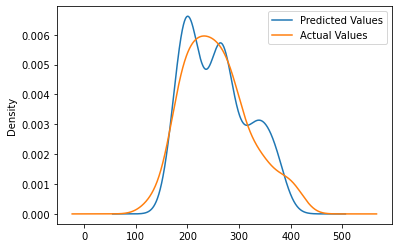

In [24]:
# kde graph

df.plot.kde()

In [25]:
# sort yTestPredicted

zz = np.asanyarray(y_test_predicted).reshape(-1)

sorted_yTestPredicted = np.sort(zz)

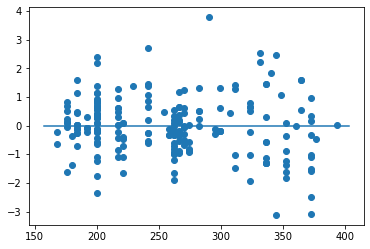

In [26]:
# residual plots to observe

from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()

residuals = y_test-y_test_predicted

residualsStd = scaler1.fit_transform(residuals)

plt.scatter(y_test_predicted,residualsStd)

plt.plot(np.arange(sorted_yTestPredicted[0]-10, sorted_yTestPredicted[-1]+10),np.zeros(len(np.arange(sorted_yTestPredicted[0]-10, sorted_yTestPredicted[-1]+10))))